<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/Merced%26Napa_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MERCED COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Merced County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Merced County.csv to Merced County.csv
            Merced County
Dates                    
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
...                   ...
2021-12-31       391269.0
2022-01-31       398151.0
2022-02-28       404977.0
2022-03-31       413688.0
2022-04-30       420287.0

[268 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Merced County
Dates,
2001-01-31,141452.0
2001-02-28,142295.0
2001-03-31,143417.0
2001-04-30,145467.0
2001-05-31,146467.0
...,...
2021-12-31,391269.0
2022-01-31,398151.0
2022-02-28,404977.0


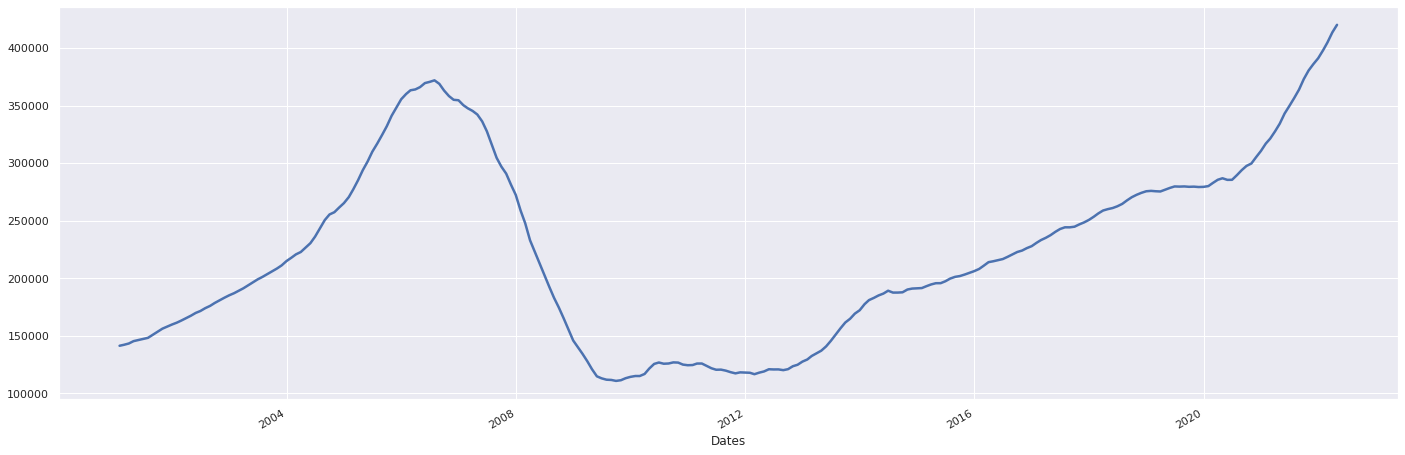

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Merced County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

255

In [ ]:
DATOS = RealData_df['Merced County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(215, 2, 1) (215, 1)
(36, 2, 1) (36, 1)


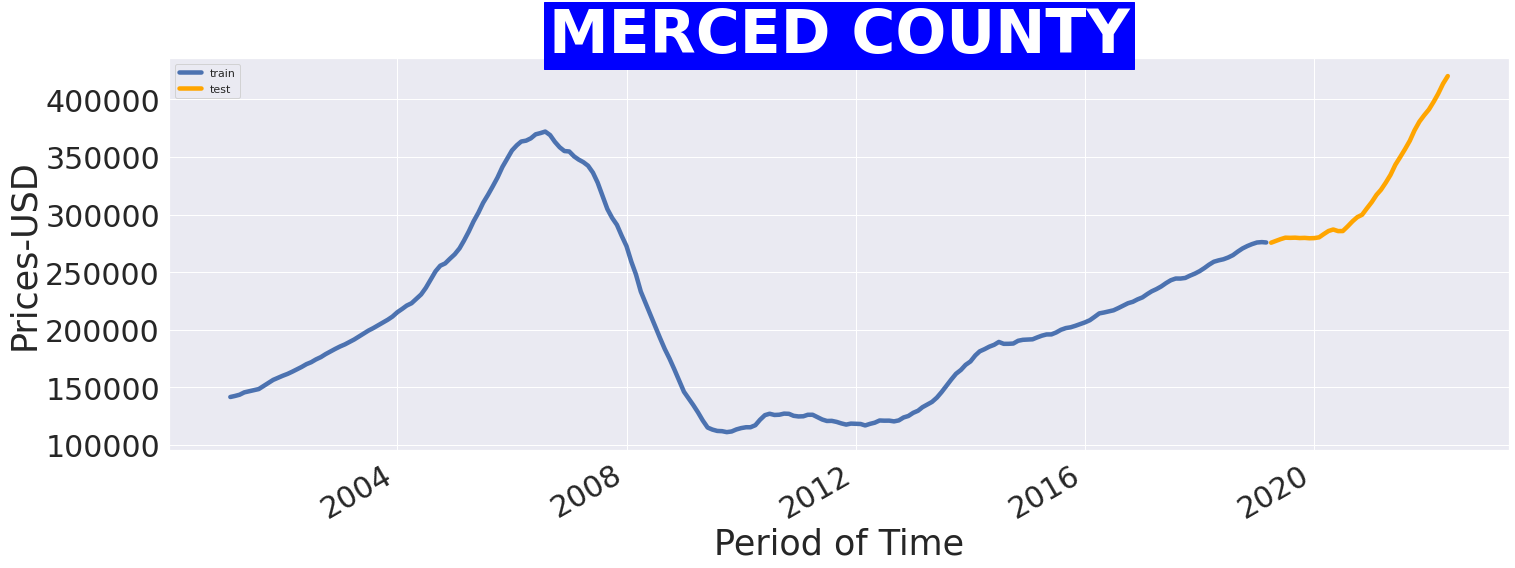

In [ ]:
RealData_df['Merced County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Merced County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("MERCED COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
43/43 [==============================] - 3s 17ms/step - loss: 0.2082 - mean_absolute_error: 0.3783 - val_loss: 0.3066 - val_mean_absolute_error: 0.5073
Epoch 2/60
43/43 [==============================] - 0s 5ms/step - loss: 0.0473 - mean_absolute_error: 0.1639 - val_loss: 0.0740 - val_mean_absolute_error: 0.2447
Epoch 3/60
43/43 [==============================] - 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0504 - val_loss: 0.0089 - val_mean_absolute_error: 0.0706
Epoch 4/60
43/43 [==============================] - 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0380 - val_loss: 0.0072 - val_mean_absolute_error: 0.0650
Epoch 5/60
43/43 [==============================] - 1s 13ms/step - loss: 0.0033 - mean_absolute_error: 0.0372 - val_loss: 0.0064 - val_mean_absolute_error: 0.0620
Epoch 6/60
43/43 [==============================] - 1s 12ms/step - loss: 0.0032 - mean_absolute_error: 0.0384 - val_loss: 0.0077 - val_mean_absolute_error: 0.0677
Epoch 7/60
43/43 [=======

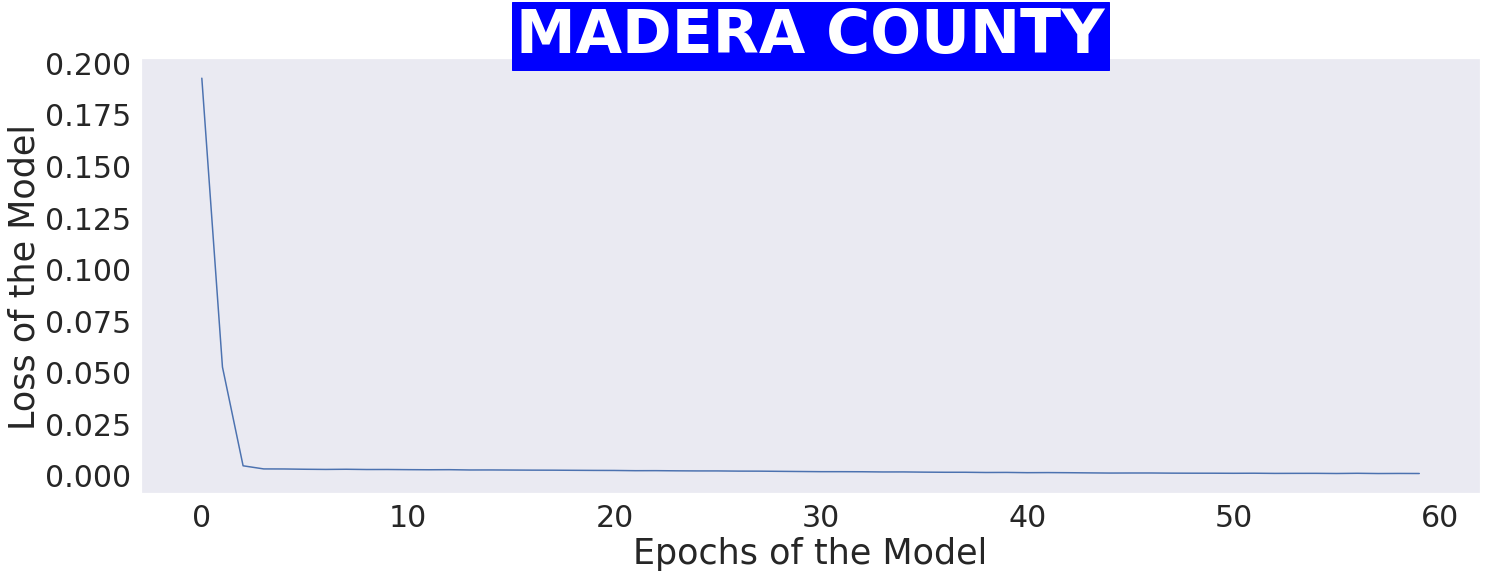

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("MERCED COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([1.0295409, 1.0503552, 1.0722086, 1.0995771, 1.1335962, 1.1773094,
       1.2027991, 1.2085993, 1.2158911, 1.2213744, 1.2519962, 1.2881343,
       1.3357834, 1.3857967, 1.4365801, 1.4721184, 1.483586 , 1.4981158,
       1.536463 , 1.6145002, 1.7003417, 1.7835698, 1.882649 , 2.0139403,
       2.156309 , 2.2826257, 2.3767483, 2.482729 , 2.5926585, 2.7067697,
       2.8075612, 2.8875377], dtype=float32)

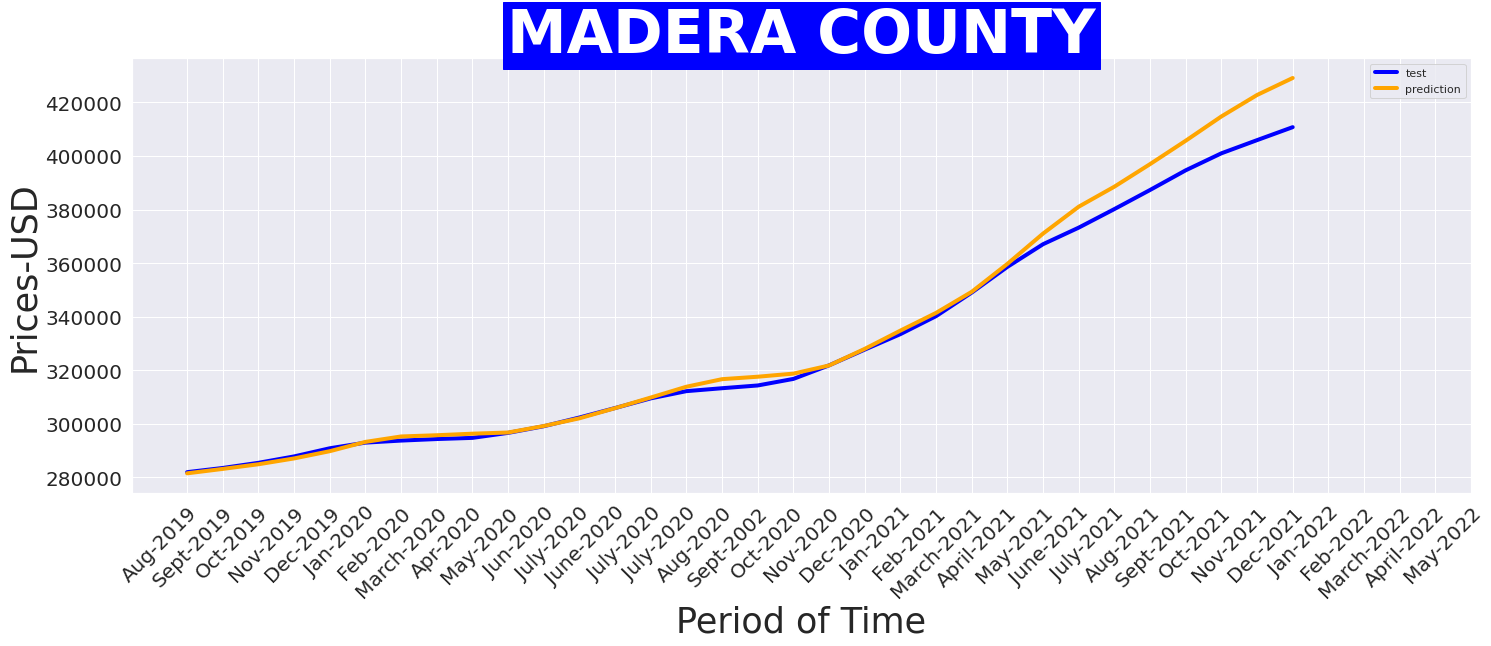

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("MERCED COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'MADERA COUNTY')

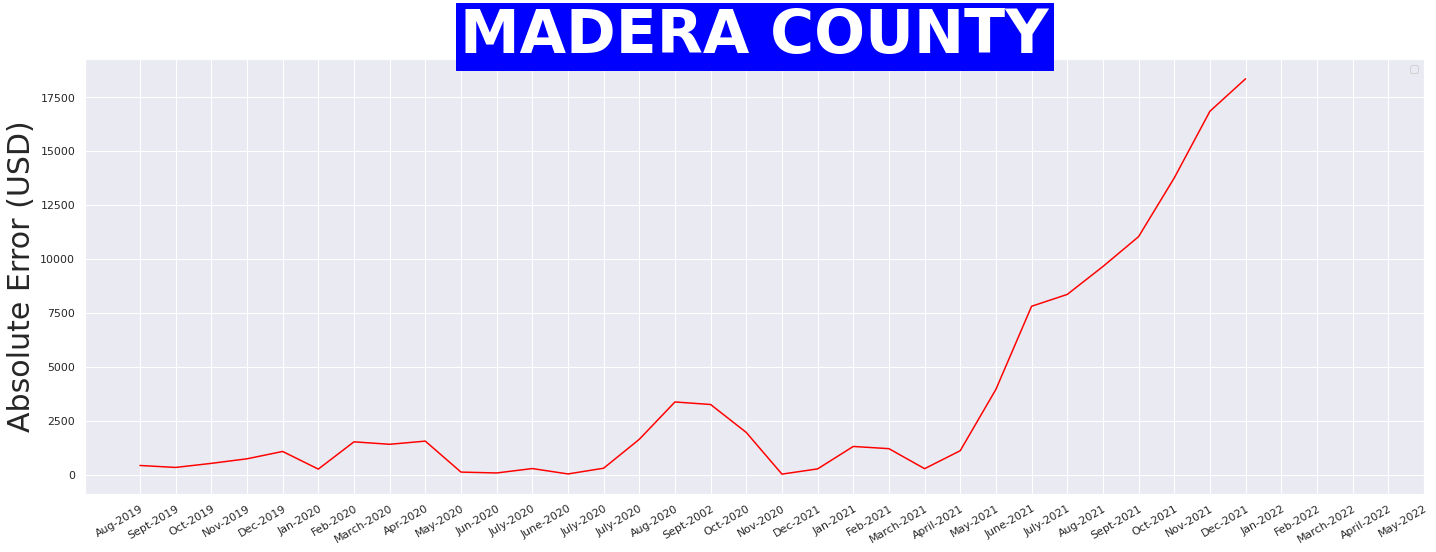

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("MERCED COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

#plt.grid()

In [ ]:
y_pred_inv

array([[281497.2 ],
       [283151.  ],
       [284887.38],
       [287061.97],
       [289764.94],
       [293238.22],
       [295263.5 ],
       [295724.38],
       [296303.75],
       [296739.44],
       [299172.5 ],
       [302043.84],
       [305829.84],
       [309803.7 ],
       [313838.7 ],
       [316662.4 ],
       [317573.56],
       [318728.03],
       [321774.94],
       [327975.44],
       [334796.03],
       [341408.94],
       [349281.34],
       [359713.16],
       [371025.1 ],
       [381061.7 ],
       [388540.22],
       [396961.  ],
       [405695.5 ],
       [414762.25],
       [422770.7 ],
       [429125.25]], dtype=float32)

# **MARIN COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Marin County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Marin County.csv to Marin County.csv
            Marin County
Dates                   
2000-01-31        552730
2000-02-29        556084
2000-03-31        560475
2000-04-30        569794
2000-05-31        580025
...                  ...
2021-12-31       1524671
2022-01-31       1538222
2022-02-28       1566258
2022-03-31       1608986
2022-04-30       1654012

[268 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Marin County
Dates,
2000-01-31,552730
2000-02-29,556084
2000-03-31,560475
2000-04-30,569794
2000-05-31,580025
...,...
2021-12-31,1524671
2022-01-31,1538222
2022-02-28,1566258


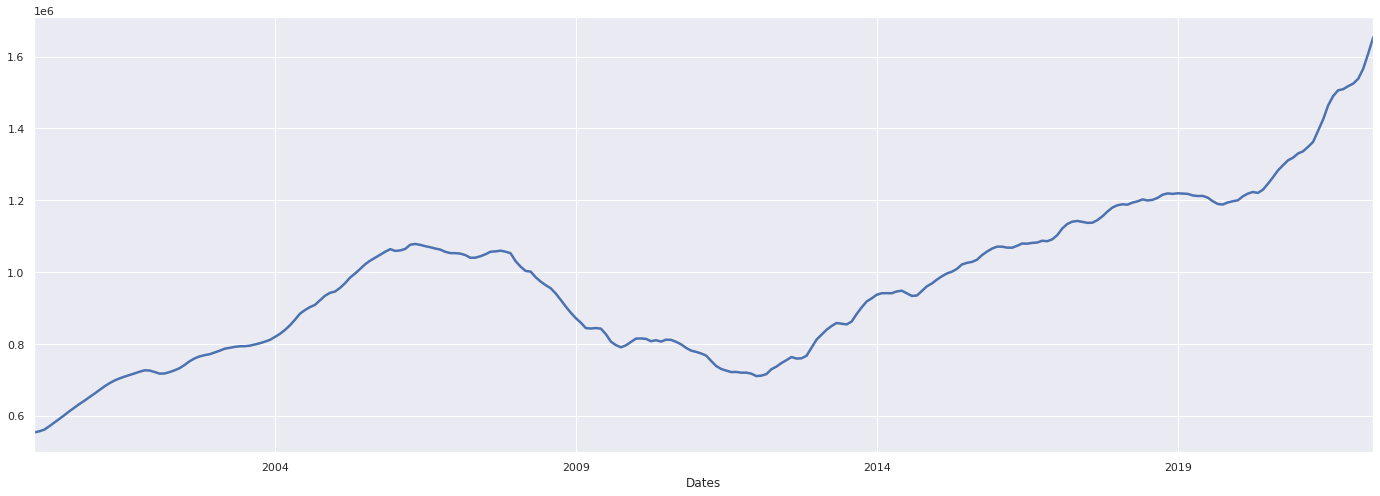

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Marin County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Marin County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


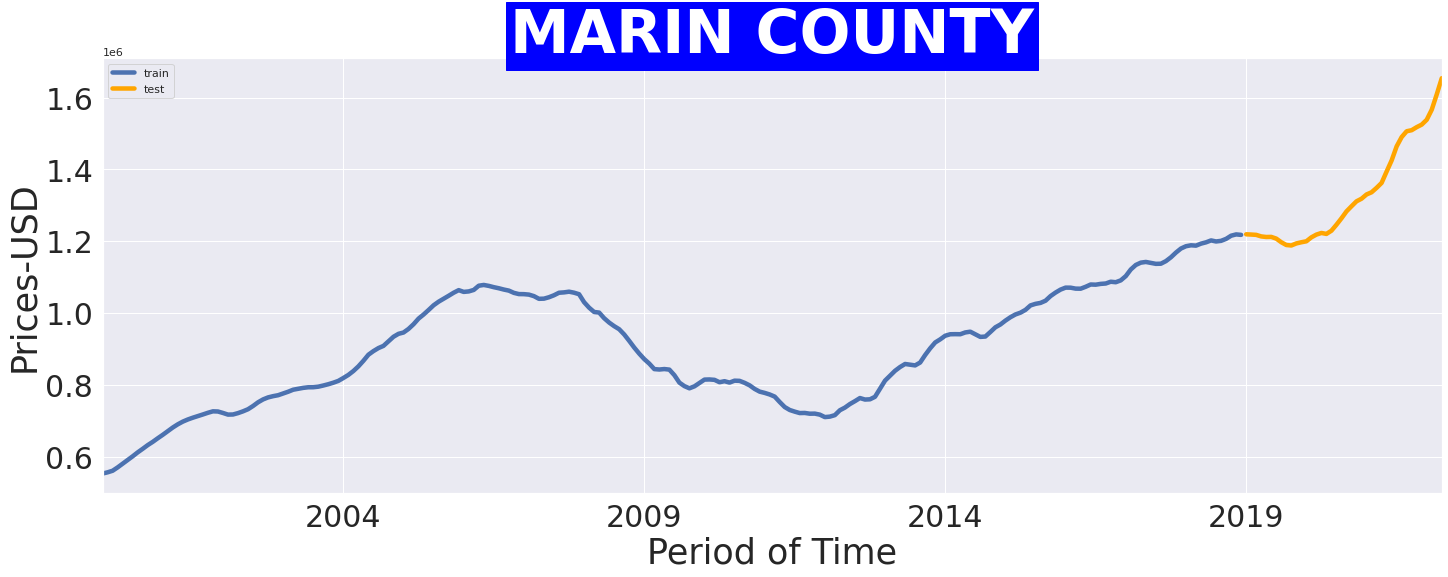

In [ ]:
RealData_df['Marin County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Marin County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("MARIN COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
44/44 [==============================] - 3s 17ms/step - loss: 0.2008 - mean_absolute_error: 0.3759 - val_loss: 0.8024 - val_mean_absolute_error: 0.8502
Epoch 2/60
44/44 [==============================] - 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.1740 - val_loss: 0.1077 - val_mean_absolute_error: 0.2995
Epoch 3/60
44/44 [==============================] - 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0467 - val_loss: 0.0192 - val_mean_absolute_error: 0.1078
Epoch 4/60
44/44 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0411 - val_loss: 0.0190 - val_mean_absolute_error: 0.1066
Epoch 5/60
44/44 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0406 - val_loss: 0.0350 - val_mean_absolute_error: 0.1554
Epoch 6/60
44/44 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0405 - val_loss: 0.0077 - val_mean_absolute_error: 0.0669
Epoch 7/60
44/44 [=========

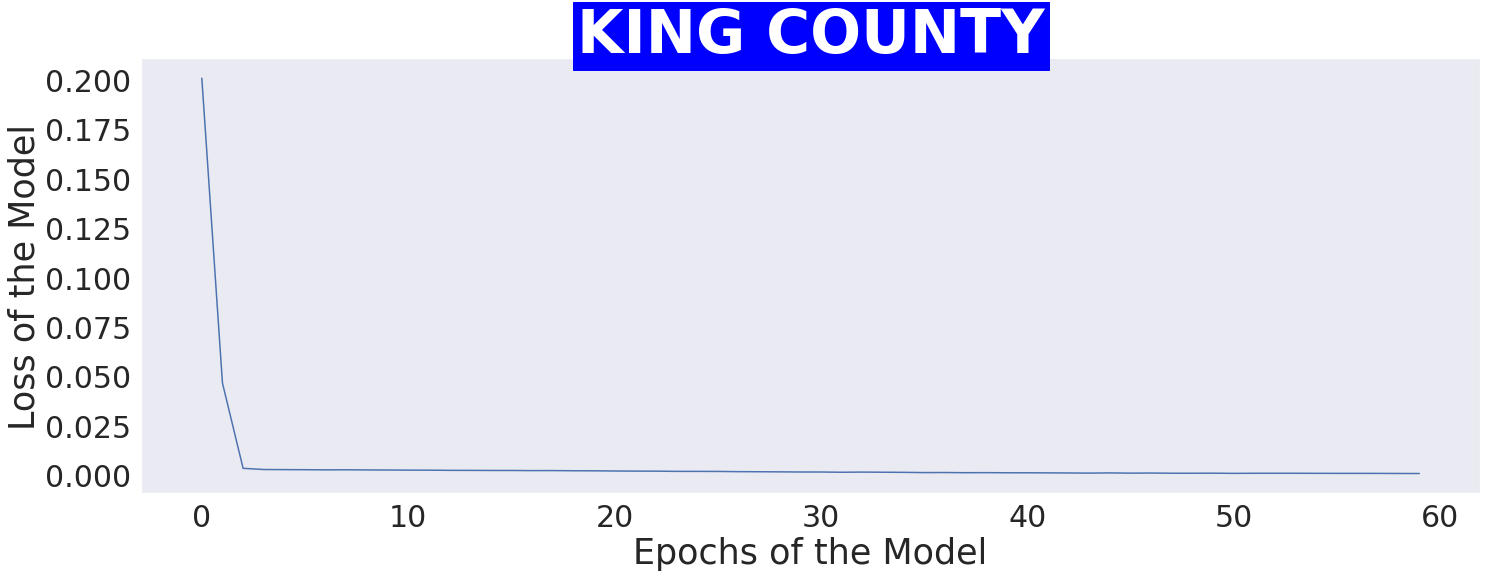

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("KING COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.92812747, 0.9421582 , 0.95080125, 0.9328249 , 0.92036605,
       0.91785926, 0.9352046 , 0.9599092 , 1.0067661 , 1.0382899 ,
       1.0770755 , 1.1041082 , 1.149641  , 1.1590201 , 1.167735  ,
       1.1938572 , 1.2646061 , 1.3283377 , 1.38062   , 1.4138323 ,
       1.4630737 , 1.5332686 , 1.5939577 , 1.6383585 , 1.6667423 ,
       1.7108414 , 1.7921218 , 1.8884134 , 1.9769255 , 2.0674565 ,
       2.1304257 , 2.2035115 , 2.2772973 , 2.359158  , 2.4485438 ,
       2.5413518 ], dtype=float32)

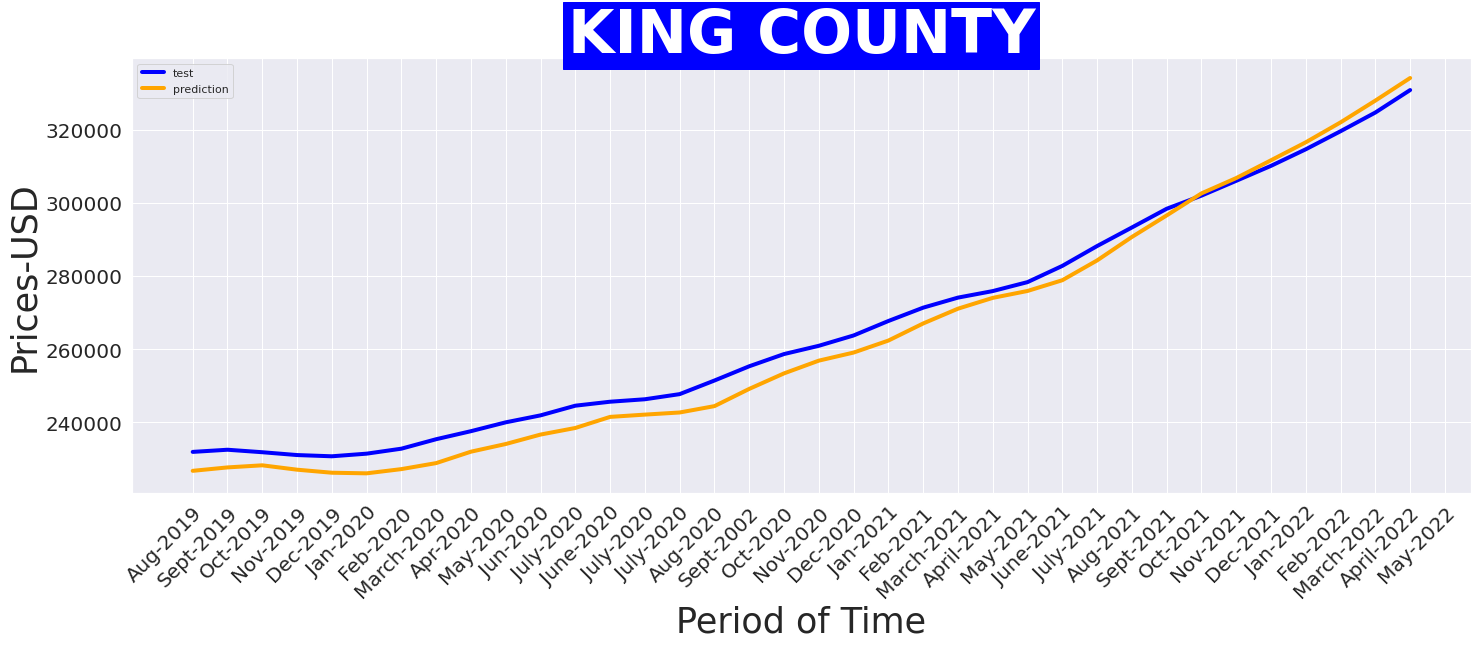

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("KING COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'KING COUNTY')

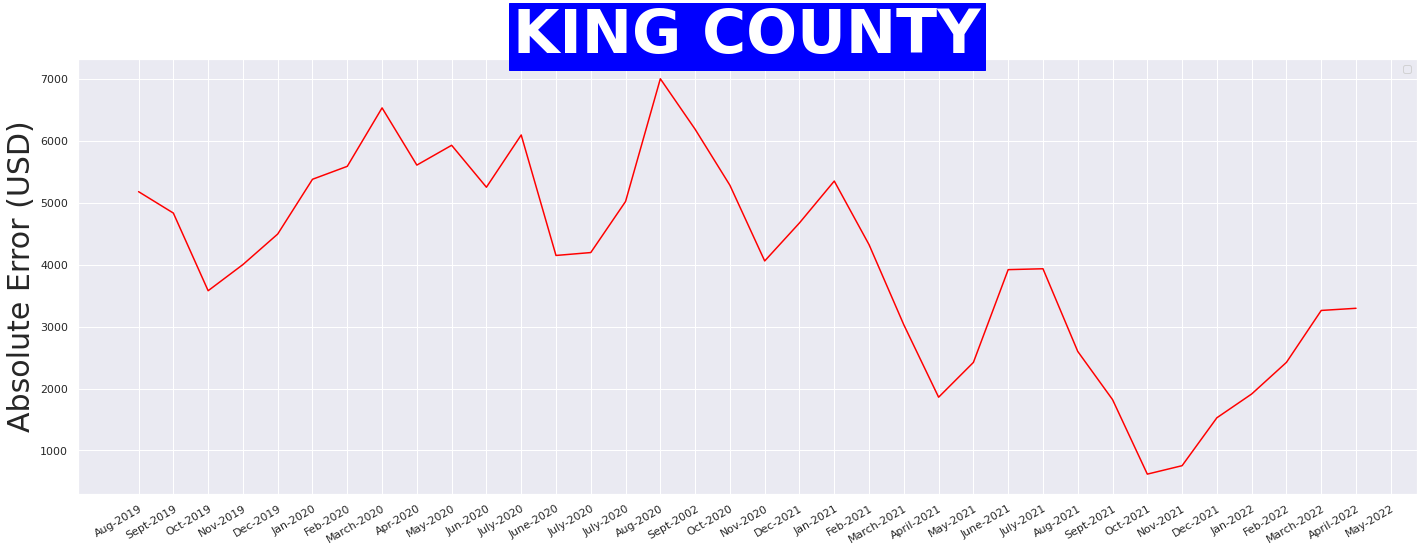

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("KING COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[226685.3 ],
       [227620.33],
       [228196.33],
       [226998.36],
       [226168.06],
       [226001.02],
       [227156.94],
       [228803.28],
       [231925.89],
       [234026.7 ],
       [236611.42],
       [238412.92],
       [241447.3 ],
       [242072.34],
       [242653.11],
       [244393.92],
       [249108.75],
       [253355.9 ],
       [256840.08],
       [259053.4 ],
       [262334.9 ],
       [267012.8 ],
       [271057.22],
       [274016.16],
       [275907.72],
       [278846.53],
       [284263.16],
       [290680.22],
       [296578.78],
       [302611.9 ],
       [306808.25],
       [311678.8 ],
       [316596.  ],
       [322051.34],
       [328008.12],
       [334193.  ]], dtype=float32)